**Table of contents**<a id='toc0_'></a>    
- [데이터 분리](#toc1_)    
- [Logistic regression](#toc2_)    
- [classification_report](#toc3_)    
- [Confusion matrix](#toc4_)    
- [precision_recall curve](#toc5_)    
- [threshold = 0.5](#toc6_)    
- [threshold 바꿔보기 - Binarizer](#toc7_)    
- [classification_report](#toc8_)    
- [Confusion matrix](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import pandas as pd

In [ ]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/wine.csv'

wine=pd.read_csv(wine_url, index_col=0)
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

# <a id='toc1_'></a>[데이터 분리](#toc0_)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# <a id='toc2_'></a>[Logistic regression](#toc0_)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.7427361939580527, 0.7438461538461538)

# <a id='toc3_'></a>[classification_report](#toc0_)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



# <a id='toc4_'></a>[Confusion matrix](#toc0_)

|TP|FN|
|--|--|
|FP|TN|

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]])

# <a id='toc5_'></a>[precision_recall curve](#toc0_)

In [10]:
lr.predict_proba(X_test)

array([[0.40537077, 0.59462923],
       [0.51023884, 0.48976116],
       [0.10180606, 0.89819394],
       ...,
       [0.2253892 , 0.7746108 ],
       [0.67355642, 0.32644358],
       [0.31430369, 0.68569631]])

In [17]:
from sklearn.metrics import precision_recall_curve

pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

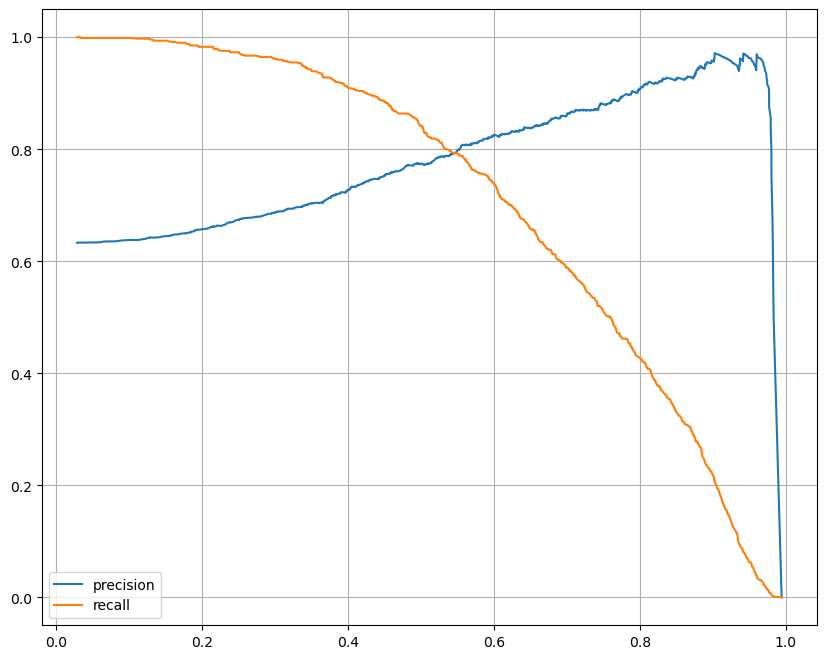

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid()
plt.legend()
plt.show()

# <a id='toc6_'></a>[threshold = 0.5](#toc0_)

In [19]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40537077, 0.59462923],
       [0.51023884, 0.48976116],
       [0.10180606, 0.89819394]])

In [ ]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40537077, 0.59462923, 1.        ],
       [0.51023884, 0.48976116, 0.        ],
       [0.10180606, 0.89819394, 1.        ],
       ...,
       [0.2253892 , 0.7746108 , 1.        ],
       [0.67355642, 0.32644358, 0.        ],
       [0.31430369, 0.68569631, 1.        ]])

# <a id='toc7_'></a>[threshold 바꿔보기 - Binarizer](#toc0_)

In [ ]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin


array([0., 0., 1., ..., 1., 0., 1.])

# <a id='toc8_'></a>[classification_report](#toc0_)

In [ ]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



# <a id='toc9_'></a>[Confusion matrix](#toc0_)

In [25]:
confusion_matrix(y_test, pred_bin)

array([[348, 129],
       [216, 607]])